In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("rimini_climate.txt", sep=",")

In [ ]:
print("----------------\nData exploration\n----------------")
print(data.info())
print(data.describe())
print(data.shape)
print(data.head(5))
print("----------------")

In [5]:
data = data.drop(columns=["min_temp", "max_temp"])

data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")
data.reset_index(drop=True, inplace=True)
data = data.set_index("date")

In [ ]:
print("----------------\nData after drop min_temp, max_temp\n----------------")
print(data.head(5))
print("----")

In [52]:
# check data distribution
A, M, R, STD = data["temp"].median(), data["temp"].mean(), data["temp"].max() - data["temp"].min(), data["temp"].std()
print(A,M,R, STD)
# 68-95-99.7 rule
# 68 % of data are A - STD <= x <= a + STD

perc68 = sum((data["temp"] >= A - STD) & (data["temp"] <= A + STD)) / len(data["temp"])
print(f"{round(perc68 * 100, 2)}% of data lie between {A - STD} and {A + STD} - Test {'failed' if perc68 < 0.68 else 'passed'}")

# check if 95 % of data are A - 2STD <= x <= A + 2STD
perc95 = sum((data["temp"] >= A - (2*STD)) & (data["temp"] <= A + (2*STD))) / len(data["temp"])
print(f"{round(perc95 * 100, 2)}% of data lie between {A - 2*STD} and {A + 2*STD} - Test {'failed' if perc95 < 0.95 else 'passed'}")

# 99.7 % of data are A - 3STD <= x <= A + 3STD
perc997 = sum((data["temp"] >= A - (3*STD)) & (data["temp"] <= A + (3*STD))) / len(data["temp"])
print(f"{round(perc997 * 100, 2)}% of data lie between {A - 3*STD} and {A + 3*STD} - Test {'failed' if perc997 < 0.997 else 'passed'}")

13.1 13.089736536184175 45.8 7.3310184919617605
61.26% of data lie between 5.768981508038239 and 20.43101849196176 - Test failed
98.42% of data lie between -1.5620369839235213 and 27.762036983923522 - Test passed
99.99% of data lie between -8.893055475885282 and 35.09305547588528 - Test passed


In [7]:
# raggruppiamo le temperature ottenute in zone diverse di Rimini per lo stesso giorno aggregandole con la media
data["month"] = data.index.month
data["year"] = data.index.year

In [16]:
tot_years = 2011 -1961

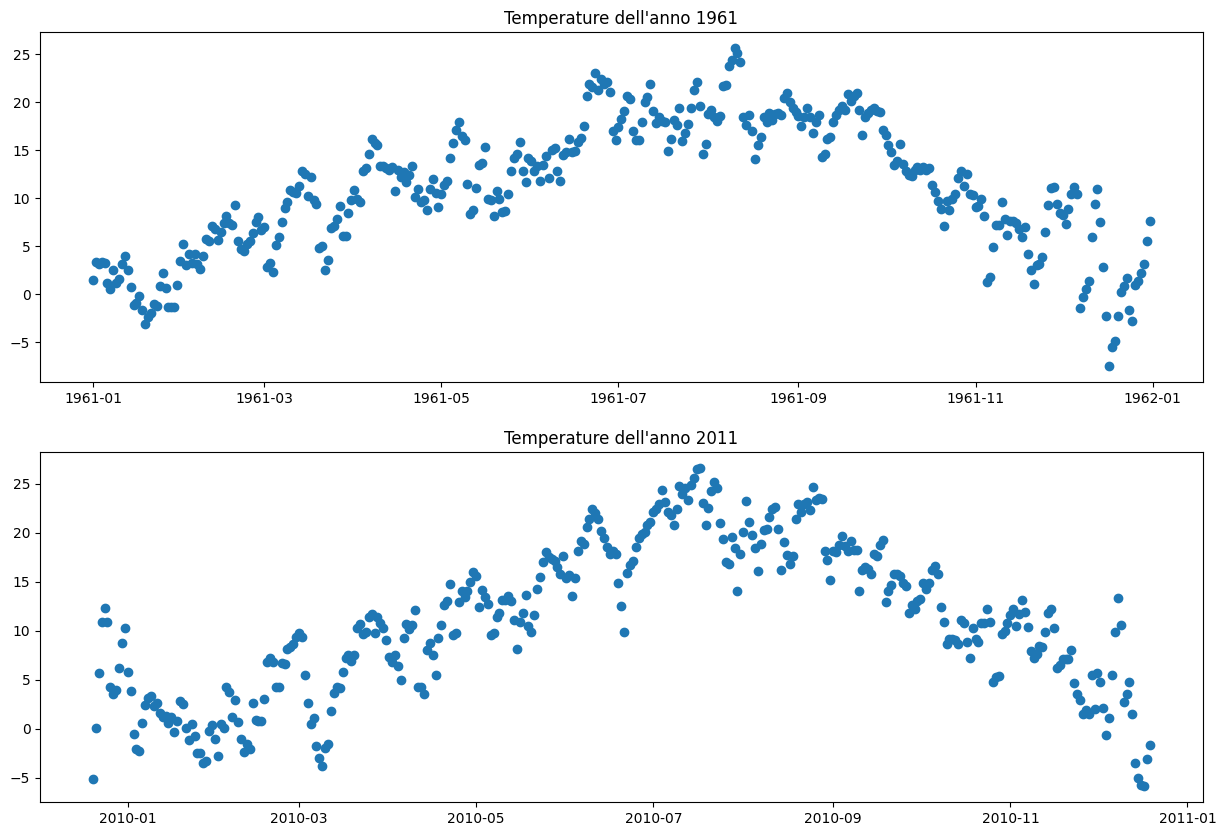

In [30]:
fig, axs = plt.subplots(2,1)
fig.set_size_inches((15, 10))
axs[0].set_title("Temperature dell'anno 1961")
axs[1].set_title("Temperature dell'anno 2011")
axs[0].scatter(x = data.index[:365],  y = data["temp"][:365])
axs[1].scatter(x = data.index[(365*(tot_years-1)):(365*tot_years)],  y = data["temp"][365*(tot_years-1):(365* tot_years)])
plt.show()

In [ ]:

# aggreghiamo le informazioni 
pivot_month = pd.pivot_table(data, values = "temp", index="month", columns="year", aggfunc="mean")
print(pivot_month)
pivot_month.plot()
plt.show()

In [34]:
pivot_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1961    12 non-null     float64
 1   1962    12 non-null     float64
 2   1963    12 non-null     float64
 3   1964    12 non-null     float64
 4   1965    12 non-null     float64
 5   1966    12 non-null     float64
 6   1967    12 non-null     float64
 7   1968    12 non-null     float64
 8   1969    12 non-null     float64
 9   1970    12 non-null     float64
 10  1971    12 non-null     float64
 11  1972    12 non-null     float64
 12  1973    12 non-null     float64
 13  1974    12 non-null     float64
 14  1975    12 non-null     float64
 15  1976    12 non-null     float64
 16  1977    12 non-null     float64
 17  1978    12 non-null     float64
 18  1979    12 non-null     float64
 19  1980    12 non-null     float64
 20  1981    12 non-null     float64
 21  1982    12 non-null     float64
 22  1983    1

In [ ]:
month_seas_mean = pivot_month.mean(axis = 1)
month_seas_mean